In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
cust_df = pd.read_csv("./train_santander.csv", encoding = 'latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print("unsatidfied 비율은 {0:.2f}".format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatidfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print("피처 데이터 shape: {0}".format(X_features.shape))

피처 데이터 shape: (76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state =0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('\n 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)


 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [10]:
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [11]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

gridcv = GridSearchCV(xgb_clf, param_grid=params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79161	validation_1-auc:0.79321
[1]	validation_0-auc:0.81865	validation_1-auc:0.81375
[2]	validation_0-auc:0.82586	validation_1-auc:0.81846
[3]	validation_0-auc:0.82789	validation_1-auc:0.82226
[4]	validation_0-auc:0.83249	validation_1-auc:0.82677
[5]	validation_0-auc:0.83477	validation_1-auc:0.83225
[6]	validation_0-auc:0.83340	validation_1-auc:0.82654
[7]	validation_0-auc:0.84223	validation_1-auc:0.83486
[8]	validation_0-auc:0.84586	validation_1-auc:0.83682
[9]	validation_0-auc:0.84557	validation_1-auc:0.83472
[10]	validation_0-auc:0.84423	validation_1-auc:0.83181
[11]	validation_0-auc:0.84428	validation_1-auc:0.82920
[12]	validation_0-auc:0.85176	validation_1-auc:0.83433
[13]	validation_0-auc:0.85540	validation_1-auc:0.83565
[14]	validation_0-auc:0.85719	validation_1-auc:0.83696
[15]	validation_0-auc:0.85849	validation_1-auc:0.83561
[16]	validation_0-auc:0.85964	validation_1-auc:0.83578
[17]	validation_0-auc:0.86092	validation_1-auc:0.83570
[18]	validation_0-au

[56]	validation_0-auc:0.88146	validation_1-auc:0.83873
[57]	validation_0-auc:0.88158	validation_1-auc:0.83860
[58]	validation_0-auc:0.88183	validation_1-auc:0.83810
[59]	validation_0-auc:0.88192	validation_1-auc:0.83774
[0]	validation_0-auc:0.79210	validation_1-auc:0.79292
[1]	validation_0-auc:0.81759	validation_1-auc:0.81404
[2]	validation_0-auc:0.82567	validation_1-auc:0.81864
[3]	validation_0-auc:0.82819	validation_1-auc:0.82244
[4]	validation_0-auc:0.83233	validation_1-auc:0.82618
[5]	validation_0-auc:0.83480	validation_1-auc:0.83163
[6]	validation_0-auc:0.83342	validation_1-auc:0.82840
[7]	validation_0-auc:0.84265	validation_1-auc:0.83512
[8]	validation_0-auc:0.84614	validation_1-auc:0.83742
[9]	validation_0-auc:0.84573	validation_1-auc:0.83475
[10]	validation_0-auc:0.84426	validation_1-auc:0.83066
[11]	validation_0-auc:0.84358	validation_1-auc:0.82937
[12]	validation_0-auc:0.85089	validation_1-auc:0.83491
[13]	validation_0-auc:0.85457	validation_1-auc:0.83785
[14]	validation_0-au

[0]	validation_0-auc:0.80843	validation_1-auc:0.80885
[1]	validation_0-auc:0.82920	validation_1-auc:0.82211
[2]	validation_0-auc:0.83320	validation_1-auc:0.82400
[3]	validation_0-auc:0.83625	validation_1-auc:0.82577
[4]	validation_0-auc:0.84188	validation_1-auc:0.82897
[5]	validation_0-auc:0.84455	validation_1-auc:0.83377
[6]	validation_0-auc:0.84503	validation_1-auc:0.82916
[7]	validation_0-auc:0.85319	validation_1-auc:0.83364
[8]	validation_0-auc:0.85976	validation_1-auc:0.83390
[9]	validation_0-auc:0.85952	validation_1-auc:0.82834
[10]	validation_0-auc:0.85919	validation_1-auc:0.82378
[11]	validation_0-auc:0.85956	validation_1-auc:0.82400
[12]	validation_0-auc:0.86574	validation_1-auc:0.82888
[13]	validation_0-auc:0.87028	validation_1-auc:0.83251
[14]	validation_0-auc:0.87240	validation_1-auc:0.83311
[15]	validation_0-auc:0.87366	validation_1-auc:0.83080
[16]	validation_0-auc:0.87568	validation_1-auc:0.83134
[17]	validation_0-auc:0.87777	validation_1-auc:0.83255
[18]	validation_0-au

[21]	validation_0-auc:0.87528	validation_1-auc:0.83259
[22]	validation_0-auc:0.87571	validation_1-auc:0.83274
[23]	validation_0-auc:0.87659	validation_1-auc:0.83362
[24]	validation_0-auc:0.87708	validation_1-auc:0.83315
[25]	validation_0-auc:0.87741	validation_1-auc:0.83338
[26]	validation_0-auc:0.87761	validation_1-auc:0.83358
[27]	validation_0-auc:0.87814	validation_1-auc:0.83337
[28]	validation_0-auc:0.87820	validation_1-auc:0.83346
[29]	validation_0-auc:0.87882	validation_1-auc:0.83331
[30]	validation_0-auc:0.87900	validation_1-auc:0.83315
[31]	validation_0-auc:0.87990	validation_1-auc:0.83277
[32]	validation_0-auc:0.88062	validation_1-auc:0.83284
[33]	validation_0-auc:0.88094	validation_1-auc:0.83339
[34]	validation_0-auc:0.88210	validation_1-auc:0.83309
[35]	validation_0-auc:0.88208	validation_1-auc:0.83317
[36]	validation_0-auc:0.88225	validation_1-auc:0.83314
[37]	validation_0-auc:0.88238	validation_1-auc:0.83292
[0]	validation_0-auc:0.81176	validation_1-auc:0.80947
[1]	validat

[44]	validation_0-auc:0.87845	validation_1-auc:0.83268
[0]	validation_0-auc:0.80863	validation_1-auc:0.80010
[1]	validation_0-auc:0.82349	validation_1-auc:0.81717
[2]	validation_0-auc:0.82654	validation_1-auc:0.81737
[3]	validation_0-auc:0.82988	validation_1-auc:0.82281
[4]	validation_0-auc:0.83570	validation_1-auc:0.82554
[5]	validation_0-auc:0.83917	validation_1-auc:0.82930
[6]	validation_0-auc:0.84492	validation_1-auc:0.83396
[7]	validation_0-auc:0.84657	validation_1-auc:0.83569
[8]	validation_0-auc:0.84837	validation_1-auc:0.83476
[9]	validation_0-auc:0.85009	validation_1-auc:0.83841
[10]	validation_0-auc:0.85017	validation_1-auc:0.83887
[11]	validation_0-auc:0.85091	validation_1-auc:0.83723
[12]	validation_0-auc:0.85584	validation_1-auc:0.83976
[13]	validation_0-auc:0.85900	validation_1-auc:0.84063
[14]	validation_0-auc:0.86060	validation_1-auc:0.84054
[15]	validation_0-auc:0.86167	validation_1-auc:0.84086
[16]	validation_0-auc:0.86304	validation_1-auc:0.84085
[17]	validation_0-au

[13]	validation_0-auc:0.85817	validation_1-auc:0.84131
[14]	validation_0-auc:0.85946	validation_1-auc:0.84041
[15]	validation_0-auc:0.86040	validation_1-auc:0.83984
[16]	validation_0-auc:0.86126	validation_1-auc:0.83954
[17]	validation_0-auc:0.86170	validation_1-auc:0.83947
[18]	validation_0-auc:0.86276	validation_1-auc:0.83945
[19]	validation_0-auc:0.86327	validation_1-auc:0.84019
[20]	validation_0-auc:0.86381	validation_1-auc:0.84075
[21]	validation_0-auc:0.86454	validation_1-auc:0.84078
[22]	validation_0-auc:0.86531	validation_1-auc:0.84164
[23]	validation_0-auc:0.86598	validation_1-auc:0.84128
[24]	validation_0-auc:0.86650	validation_1-auc:0.84078
[25]	validation_0-auc:0.86717	validation_1-auc:0.84069
[26]	validation_0-auc:0.86742	validation_1-auc:0.84066
[27]	validation_0-auc:0.86807	validation_1-auc:0.84017
[28]	validation_0-auc:0.86913	validation_1-auc:0.84027
[29]	validation_0-auc:0.86952	validation_1-auc:0.84014
[30]	validation_0-auc:0.86972	validation_1-auc:0.84016
[31]	valid

[22]	validation_0-auc:0.88867	validation_1-auc:0.83811
[23]	validation_0-auc:0.88984	validation_1-auc:0.83780
[24]	validation_0-auc:0.89035	validation_1-auc:0.83731
[25]	validation_0-auc:0.89094	validation_1-auc:0.83717
[26]	validation_0-auc:0.89143	validation_1-auc:0.83694
[27]	validation_0-auc:0.89200	validation_1-auc:0.83660
[28]	validation_0-auc:0.89281	validation_1-auc:0.83711
[29]	validation_0-auc:0.89290	validation_1-auc:0.83771
[30]	validation_0-auc:0.89310	validation_1-auc:0.83717
[31]	validation_0-auc:0.89338	validation_1-auc:0.83704
[32]	validation_0-auc:0.89415	validation_1-auc:0.83731
[33]	validation_0-auc:0.89484	validation_1-auc:0.83674
[34]	validation_0-auc:0.89584	validation_1-auc:0.83723
[35]	validation_0-auc:0.89607	validation_1-auc:0.83724
[36]	validation_0-auc:0.89655	validation_1-auc:0.83646
[37]	validation_0-auc:0.89681	validation_1-auc:0.83664
[38]	validation_0-auc:0.89694	validation_1-auc:0.83654
[39]	validation_0-auc:0.89735	validation_1-auc:0.83618
[40]	valid

[36]	validation_0-auc:0.88756	validation_1-auc:0.83799
[37]	validation_0-auc:0.88854	validation_1-auc:0.83840
[38]	validation_0-auc:0.88961	validation_1-auc:0.83815
[0]	validation_0-auc:0.82297	validation_1-auc:0.81707
[1]	validation_0-auc:0.83141	validation_1-auc:0.82133
[2]	validation_0-auc:0.83805	validation_1-auc:0.82785
[3]	validation_0-auc:0.84271	validation_1-auc:0.82901
[4]	validation_0-auc:0.84766	validation_1-auc:0.83398
[5]	validation_0-auc:0.85126	validation_1-auc:0.83381
[6]	validation_0-auc:0.85486	validation_1-auc:0.83360
[7]	validation_0-auc:0.85943	validation_1-auc:0.83287
[8]	validation_0-auc:0.86243	validation_1-auc:0.83187
[9]	validation_0-auc:0.86501	validation_1-auc:0.83304
[10]	validation_0-auc:0.86496	validation_1-auc:0.83318
[11]	validation_0-auc:0.86466	validation_1-auc:0.83180
[12]	validation_0-auc:0.87013	validation_1-auc:0.83453
[13]	validation_0-auc:0.87319	validation_1-auc:0.83548
[14]	validation_0-auc:0.87479	validation_1-auc:0.83833
[15]	validation_0-au

In [12]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71027	validation_1-auc:0.71850
[1]	validation_0-auc:0.80468	validation_1-auc:0.80545
[2]	validation_0-auc:0.79920	validation_1-auc:0.79453
[3]	validation_0-auc:0.80003	validation_1-auc:0.79541
[4]	validation_0-auc:0.80539	validation_1-auc:0.79900
[5]	validation_0-auc:0.81597	validation_1-auc:0.81107
[6]	validation_0-auc:0.82330	validation_1-auc:0.81817
[7]	validation_0-auc:0.82610	validation_1-auc:0.82171
[8]	validation_0-auc:0.82915	validation_1-auc:0.82457
[9]	validation_0-auc:0.82832	validation_1-auc:0.82339
[10]	validation_0-auc:0.82960	validation_1-auc:0.82420
[11]	validation_0-auc:0.82942	validation_1-auc:0.82473
[12]	validation_0-auc:0.83116	validation_1-auc:0.82575
[13]	validation_0-auc:0.82877	validation_1-auc:0.82463
[14]	validation_0-auc:0.83088	validation_1-auc:0.82645
[15]	validation_0-auc:0.83218	validation_1-auc:0.82797
[16]	validation_0-auc:0.83283	validation_1-auc:0.82809
[17]	validation_0-auc:0.83223	validation_1-auc:0.82751
[18]	validation_0-au

[149]	validation_0-auc:0.85661	validation_1-auc:0.84152
[150]	validation_0-auc:0.85680	validation_1-auc:0.84173
[151]	validation_0-auc:0.85698	validation_1-auc:0.84175
[152]	validation_0-auc:0.85716	validation_1-auc:0.84197
[153]	validation_0-auc:0.85735	validation_1-auc:0.84185
[154]	validation_0-auc:0.85753	validation_1-auc:0.84196
[155]	validation_0-auc:0.85774	validation_1-auc:0.84209
[156]	validation_0-auc:0.85785	validation_1-auc:0.84209
[157]	validation_0-auc:0.85801	validation_1-auc:0.84233
[158]	validation_0-auc:0.85818	validation_1-auc:0.84236
[159]	validation_0-auc:0.85835	validation_1-auc:0.84236
[160]	validation_0-auc:0.85857	validation_1-auc:0.84262
[161]	validation_0-auc:0.85870	validation_1-auc:0.84254
[162]	validation_0-auc:0.85879	validation_1-auc:0.84267
[163]	validation_0-auc:0.85901	validation_1-auc:0.84272
[164]	validation_0-auc:0.85920	validation_1-auc:0.84270
[165]	validation_0-auc:0.85934	validation_1-auc:0.84266
[166]	validation_0-auc:0.85950	validation_1-auc:

[296]	validation_0-auc:0.87397	validation_1-auc:0.84330
[297]	validation_0-auc:0.87408	validation_1-auc:0.84324
[298]	validation_0-auc:0.87420	validation_1-auc:0.84330
[299]	validation_0-auc:0.87428	validation_1-auc:0.84330
[300]	validation_0-auc:0.87438	validation_1-auc:0.84331
[301]	validation_0-auc:0.87446	validation_1-auc:0.84328
[302]	validation_0-auc:0.87451	validation_1-auc:0.84325
[303]	validation_0-auc:0.87461	validation_1-auc:0.84329
[304]	validation_0-auc:0.87470	validation_1-auc:0.84326
[305]	validation_0-auc:0.87477	validation_1-auc:0.84330
[306]	validation_0-auc:0.87488	validation_1-auc:0.84335
[307]	validation_0-auc:0.87494	validation_1-auc:0.84336
[308]	validation_0-auc:0.87499	validation_1-auc:0.84334
[309]	validation_0-auc:0.87509	validation_1-auc:0.84334
[310]	validation_0-auc:0.87516	validation_1-auc:0.84335
[311]	validation_0-auc:0.87528	validation_1-auc:0.84335
[312]	validation_0-auc:0.87534	validation_1-auc:0.84330
[313]	validation_0-auc:0.87548	validation_1-auc:

In [13]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73501	validation_1-auc:0.74128
[1]	validation_0-auc:0.82359	validation_1-auc:0.81776
[2]	validation_0-auc:0.81094	validation_1-auc:0.80194
[3]	validation_0-auc:0.81288	validation_1-auc:0.80637
[4]	validation_0-auc:0.82564	validation_1-auc:0.81831
[5]	validation_0-auc:0.83066	validation_1-auc:0.82196
[6]	validation_0-auc:0.83608	validation_1-auc:0.82734
[7]	validation_0-auc:0.83832	validation_1-auc:0.82902
[8]	validation_0-auc:0.84104	validation_1-auc:0.83114
[9]	validation_0-auc:0.84000	validation_1-auc:0.83020
[10]	validation_0-auc:0.84155	validation_1-auc:0.83071
[11]	validation_0-auc:0.84090	validation_1-auc:0.82996
[12]	validation_0-auc:0.84176	validation_1-auc:0.83039
[13]	validation_0-auc:0.83970	validation_1-auc:0.82909
[14]	validation_0-auc:0.84151	validation_1-auc:0.83008
[15]	validation_0-auc:0.84436	validation_1-auc:0.83231
[16]	validation_0-auc:0.84481	validation_1-auc:0.83256
[17]	validation_0-auc:0.84456	validation_1-auc:0.83193
[18]	validation_0-au

[149]	validation_0-auc:0.88005	validation_1-auc:0.84340
[150]	validation_0-auc:0.88030	validation_1-auc:0.84355
[151]	validation_0-auc:0.88060	validation_1-auc:0.84368
[152]	validation_0-auc:0.88085	validation_1-auc:0.84378
[153]	validation_0-auc:0.88106	validation_1-auc:0.84380
[154]	validation_0-auc:0.88126	validation_1-auc:0.84384
[155]	validation_0-auc:0.88150	validation_1-auc:0.84387
[156]	validation_0-auc:0.88160	validation_1-auc:0.84388
[157]	validation_0-auc:0.88187	validation_1-auc:0.84398
[158]	validation_0-auc:0.88208	validation_1-auc:0.84413
[159]	validation_0-auc:0.88228	validation_1-auc:0.84415
[160]	validation_0-auc:0.88255	validation_1-auc:0.84416
[161]	validation_0-auc:0.88287	validation_1-auc:0.84411
[162]	validation_0-auc:0.88300	validation_1-auc:0.84393
[163]	validation_0-auc:0.88312	validation_1-auc:0.84387
[164]	validation_0-auc:0.88342	validation_1-auc:0.84398
[165]	validation_0-auc:0.88366	validation_1-auc:0.84393
[166]	validation_0-auc:0.88399	validation_1-auc:

[296]	validation_0-auc:0.90494	validation_1-auc:0.84358
[297]	validation_0-auc:0.90502	validation_1-auc:0.84353
[298]	validation_0-auc:0.90514	validation_1-auc:0.84359
[299]	validation_0-auc:0.90521	validation_1-auc:0.84360
[300]	validation_0-auc:0.90528	validation_1-auc:0.84360
[301]	validation_0-auc:0.90532	validation_1-auc:0.84356
[302]	validation_0-auc:0.90539	validation_1-auc:0.84351
[303]	validation_0-auc:0.90544	validation_1-auc:0.84354
[304]	validation_0-auc:0.90550	validation_1-auc:0.84352
[305]	validation_0-auc:0.90559	validation_1-auc:0.84349
[306]	validation_0-auc:0.90578	validation_1-auc:0.84348
[307]	validation_0-auc:0.90582	validation_1-auc:0.84351
[308]	validation_0-auc:0.90588	validation_1-auc:0.84350
[309]	validation_0-auc:0.90595	validation_1-auc:0.84340
[310]	validation_0-auc:0.90601	validation_1-auc:0.84342
[311]	validation_0-auc:0.90623	validation_1-auc:0.84340
[312]	validation_0-auc:0.90630	validation_1-auc:0.84342
[313]	validation_0-auc:0.90643	validation_1-auc:

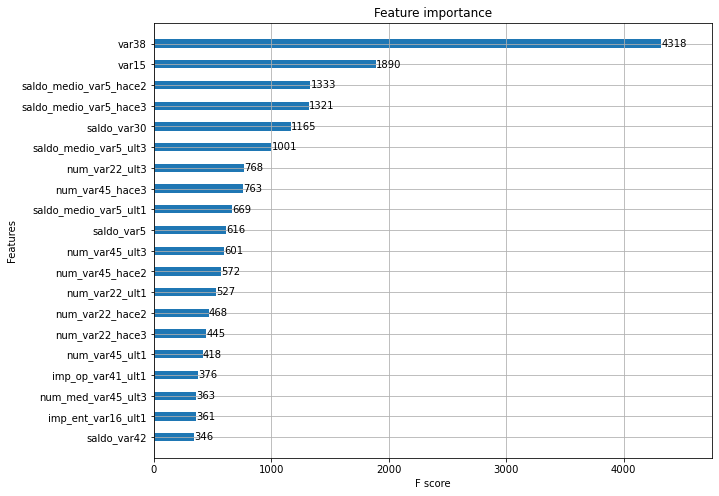

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	valid_1's binary_logloss: 0.146268
[9]	valid_0's auc: 0.850839	v

[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's auc: 0.877699	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.836229	valid_1's binary_logloss: 0.140186
[32]	valid_0's auc: 0.878492	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.140145
[33]	valid_0's auc: 0.879281	valid_0's binary_logloss: 0.122981	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140165
[34]	valid_0's auc: 0.880016	valid_0's binary_logloss: 0.12271	valid_1's auc: 0.836238	valid_1's binary_logloss: 0.140112
[35]	valid_0's auc

[15]	valid_0's auc: 0.86065	valid_0's binary_logloss: 0.130019	valid_1's auc: 0.839342	valid_1's binary_logloss: 0.141867
[16]	valid_0's auc: 0.861879	valid_0's binary_logloss: 0.129426	valid_1's auc: 0.839474	valid_1's binary_logloss: 0.141484
[17]	valid_0's auc: 0.86312	valid_0's binary_logloss: 0.128865	valid_1's auc: 0.838976	valid_1's binary_logloss: 0.141297
[18]	valid_0's auc: 0.864292	valid_0's binary_logloss: 0.128302	valid_1's auc: 0.839738	valid_1's binary_logloss: 0.140953
[19]	valid_0's auc: 0.86562	valid_0's binary_logloss: 0.12782	valid_1's auc: 0.839799	valid_1's binary_logloss: 0.140766
[20]	valid_0's auc: 0.866802	valid_0's binary_logloss: 0.127322	valid_1's auc: 0.839807	valid_1's binary_logloss: 0.140536
[21]	valid_0's auc: 0.868305	valid_0's binary_logloss: 0.126848	valid_1's auc: 0.839642	valid_1's binary_logloss: 0.140335
[22]	valid_0's auc: 0.869367	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.140242
[23]	valid_0's auc: 

[41]	valid_0's auc: 0.887212	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.839933	valid_1's binary_logloss: 0.139397
[42]	valid_0's auc: 0.887679	valid_0's binary_logloss: 0.120004	valid_1's auc: 0.839795	valid_1's binary_logloss: 0.139391
[43]	valid_0's auc: 0.88855	valid_0's binary_logloss: 0.119787	valid_1's auc: 0.839567	valid_1's binary_logloss: 0.139426
[44]	valid_0's auc: 0.888918	valid_0's binary_logloss: 0.119598	valid_1's auc: 0.839591	valid_1's binary_logloss: 0.139427
[45]	valid_0's auc: 0.889615	valid_0's binary_logloss: 0.119335	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.139412
[46]	valid_0's auc: 0.890166	valid_0's binary_logloss: 0.119099	valid_1's auc: 0.839346	valid_1's binary_logloss: 0.139475
[47]	valid_0's auc: 0.890678	valid_0's binary_logloss: 0.118869	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.1394
[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc:

[9]	valid_0's auc: 0.853725	valid_0's binary_logloss: 0.135223	valid_1's auc: 0.838944	valid_1's binary_logloss: 0.145455
[10]	valid_0's auc: 0.85489	valid_0's binary_logloss: 0.134153	valid_1's auc: 0.839913	valid_1's binary_logloss: 0.144571
[11]	valid_0's auc: 0.856642	valid_0's binary_logloss: 0.13318	valid_1's auc: 0.83836	valid_1's binary_logloss: 0.143998
[12]	valid_0's auc: 0.857381	valid_0's binary_logloss: 0.13235	valid_1's auc: 0.83849	valid_1's binary_logloss: 0.143384
[13]	valid_0's auc: 0.858555	valid_0's binary_logloss: 0.13154	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.142918
[14]	valid_0's auc: 0.859092	valid_0's binary_logloss: 0.130843	valid_1's auc: 0.837034	valid_1's binary_logloss: 0.142521
[15]	valid_0's auc: 0.860202	valid_0's binary_logloss: 0.130174	valid_1's auc: 0.836385	valid_1's binary_logloss: 0.142279
[16]	valid_0's auc: 0.861797	valid_0's binary_logloss: 0.129525	valid_1's auc: 0.835582	valid_1's binary_logloss: 0.141987
[17]	valid_0's auc: 0.86

[36]	valid_0's auc: 0.881763	valid_0's binary_logloss: 0.12187	valid_1's auc: 0.83878	valid_1's binary_logloss: 0.139315
[37]	valid_0's auc: 0.882612	valid_0's binary_logloss: 0.121565	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139322
[38]	valid_0's auc: 0.883169	valid_0's binary_logloss: 0.121312	valid_1's auc: 0.838615	valid_1's binary_logloss: 0.139324
[39]	valid_0's auc: 0.883934	valid_0's binary_logloss: 0.12102	valid_1's auc: 0.838763	valid_1's binary_logloss: 0.139293
[40]	valid_0's auc: 0.884499	valid_0's binary_logloss: 0.120794	valid_1's auc: 0.838547	valid_1's binary_logloss: 0.13931
[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.84

[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[31]	valid_0's auc: 0.879246	valid_0's binary_logloss: 0.122979	valid_1's auc: 0.840819	valid_1's binary_logloss: 0.139442
[32]	valid_0's auc: 0.880496	valid_0's binary_logloss: 0.122664	valid_1's auc: 0.840531	valid_1's binary_logloss: 0.139452
[33]	valid_0's au

[34]	valid_0's auc: 0.900819	valid_0's binary_logloss: 0.115047	valid_1's auc: 0.836189	valid_1's binary_logloss: 0.139786
[35]	valid_0's auc: 0.901929	valid_0's binary_logloss: 0.114682	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.139758
[36]	valid_0's auc: 0.902923	valid_0's binary_logloss: 0.114287	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.139739
[37]	valid_0's auc: 0.903583	valid_0's binary_logloss: 0.113893	valid_1's auc: 0.836319	valid_1's binary_logloss: 0.139831
[38]	valid_0's auc: 0.904289	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139874
[39]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.113207	valid_1's auc: 0.835797	valid_1's binary_logloss: 0.139959
[40]	valid_0's auc: 0.905808	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.835879	valid_1's binary_logloss: 0.139967
[41]	valid_0's auc: 0.906507	valid_0's binary_logloss: 0.112548	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.139996
[42]	valid_0's a

[41]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.112589	valid_1's auc: 0.836763	valid_1's binary_logloss: 0.139978
[42]	valid_0's auc: 0.907766	valid_0's binary_logloss: 0.112228	valid_1's auc: 0.836668	valid_1's binary_logloss: 0.140037
[43]	valid_0's auc: 0.908476	valid_0's binary_logloss: 0.111878	valid_1's auc: 0.836706	valid_1's binary_logloss: 0.140074
[44]	valid_0's auc: 0.908965	valid_0's binary_logloss: 0.111555	valid_1's auc: 0.836825	valid_1's binary_logloss: 0.140052
[45]	valid_0's auc: 0.90954	valid_0's binary_logloss: 0.111283	valid_1's auc: 0.836509	valid_1's binary_logloss: 0.140134
[46]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.111029	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140137
[47]	valid_0's auc: 0.910771	valid_0's binary_logloss: 0.110662	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.140222
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc:

[16]	valid_0's auc: 0.879918	valid_0's binary_logloss: 0.124701	valid_1's auc: 0.837709	valid_1's binary_logloss: 0.141283
[17]	valid_0's auc: 0.881444	valid_0's binary_logloss: 0.123911	valid_1's auc: 0.836877	valid_1's binary_logloss: 0.141158
[18]	valid_0's auc: 0.882597	valid_0's binary_logloss: 0.123216	valid_1's auc: 0.836645	valid_1's binary_logloss: 0.140956
[19]	valid_0's auc: 0.884069	valid_0's binary_logloss: 0.1225	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140747
[20]	valid_0's auc: 0.885553	valid_0's binary_logloss: 0.121835	valid_1's auc: 0.837335	valid_1's binary_logloss: 0.140578
[21]	valid_0's auc: 0.886758	valid_0's binary_logloss: 0.121199	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.1405
[22]	valid_0's auc: 0.888245	valid_0's binary_logloss: 0.120566	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.140423
[23]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.119999	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140319
[24]	valid_0's auc: 

[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	valid_1's binary_logloss: 0.145624
[9]	valid_0's auc: 0.86683

[27]	valid_0's auc: 0.893299	valid_0's binary_logloss: 0.11838	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139845
[28]	valid_0's auc: 0.894251	valid_0's binary_logloss: 0.117957	valid_1's auc: 0.837679	valid_1's binary_logloss: 0.139855
[29]	valid_0's auc: 0.895243	valid_0's binary_logloss: 0.117508	valid_1's auc: 0.837735	valid_1's binary_logloss: 0.139821
[30]	valid_0's auc: 0.896095	valid_0's binary_logloss: 0.117089	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139898
[31]	valid_0's auc: 0.897359	valid_0's binary_logloss: 0.116601	valid_1's auc: 0.837136	valid_1's binary_logloss: 0.139894
[32]	valid_0's auc: 0.898643	valid_0's binary_logloss: 0.11607	valid_1's auc: 0.836864	valid_1's binary_logloss: 0.139923
[33]	valid_0's auc: 0.89992	valid_0's binary_logloss: 0.115645	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139915
[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc:

[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_logloss: 0.13981	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.148944
[7]	valid_0's auc: 0.847188	valid_0's binary_logloss: 0.13809	valid_1's auc: 0.836752	valid_1's binary_logloss: 0.147409
[8]	valid_0's auc: 0.850075	valid_0's binary_logloss: 0.136655	valid_1's auc: 0.838523	valid_1's binary_logloss: 0.146144
[9]	valid_0's auc: 0.851721	v

[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.875088	valid_0's binary_logloss: 0.12452	valid_1's auc: 0.837397	valid_1's binary_logloss: 0.140013
[30]	valid_0's auc: 0.876006	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.837051	valid_1's binary_logloss: 0.140044
[31]	valid_0's auc: 0.876443	valid_0's binary_logloss: 0.123946	valid_1's auc: 0.837341	valid_1's binary_logloss: 0.139984
[32]	valid_0's auc: 0.877157	valid_0's binary_logloss: 0.123679	valid_1's auc: 0.837186	valid_1's binary_logloss: 0.139974
[33]	valid_0's auc: 0.877846	valid_0's binary_logloss: 0.123426	valid_1's auc: 0.836741	valid_1's binary_logloss: 0.140021
[34]	valid_0's auc: 0.879036	valid_0's binary_logloss: 0.123124	valid_1's auc: 0.836345	valid_1's binary_logloss: 0.140057
[35]	valid_0's auc

[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.839054	valid_1's binary_logloss: 0.146332
[9]	valid_0's auc: 0.851401	valid_0's binary_logloss: 0.135609	valid_1's auc: 0.839453	valid_1's binary_logloss: 0.145351
[10]	valid_0's auc: 0.852795	valid_0's binary_logloss: 0.134534	valid_1's auc: 0.840274	valid_1's binary_logloss: 0.144391
[11]	valid_0's auc: 0.853993	valid_0's binary_logloss: 0.133621	valid_1's auc: 0.840484	valid_1's binary_logloss: 0.143622
[12]	valid_0's auc: 0.856046	valid_0's binary_logloss: 0.132732	valid_1's auc: 0.840999	valid_1's binary_logloss: 0.142898
[13]	valid_0's auc: 0.857408	valid_0's binary_logloss: 0.131982	valid_1's auc: 0.840313	valid_1's binary_logloss: 0.142428
[14]	valid_0's auc: 0.858394	valid_0's binary_logloss: 0.131254	valid_1's auc: 0.840441	valid_1's binary_logloss: 0.141892
[15]	valid_0's auc: 0.859543	valid_0's binary_logloss: 0.130617	valid_1's auc: 0.840527	valid_1's binary_logloss: 0.141536
[16]	valid_0's auc

[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.139712
[30]	valid_0's auc: 0.876317	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.139716
[31]	valid_0's auc: 0.87724	valid_0's binary_logloss: 0.123841	valid_1's auc: 0.836284	valid_1's binary_logloss: 0.139683
[32]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.123594	valid_1's auc: 0.835851	valid_1's binary_logloss: 0.139729
[33]	valid_0's auc

[12]	valid_0's auc: 0.857593	valid_0's binary_logloss: 0.132493	valid_1's auc: 0.837734	valid_1's binary_logloss: 0.14288
[13]	valid_0's auc: 0.85875	valid_0's binary_logloss: 0.131727	valid_1's auc: 0.838214	valid_1's binary_logloss: 0.142368
[14]	valid_0's auc: 0.859561	valid_0's binary_logloss: 0.131032	valid_1's auc: 0.837766	valid_1's binary_logloss: 0.14195
[15]	valid_0's auc: 0.860666	valid_0's binary_logloss: 0.130386	valid_1's auc: 0.837751	valid_1's binary_logloss: 0.141607
[16]	valid_0's auc: 0.861555	valid_0's binary_logloss: 0.129851	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.14128
[17]	valid_0's auc: 0.863042	valid_0's binary_logloss: 0.129232	valid_1's auc: 0.83902	valid_1's binary_logloss: 0.141008
[18]	valid_0's auc: 0.864262	valid_0's binary_logloss: 0.128631	valid_1's auc: 0.839058	valid_1's binary_logloss: 0.140747
[19]	valid_0's auc: 0.86545	valid_0's binary_logloss: 0.128138	valid_1's auc: 0.838753	valid_1's binary_logloss: 0.140544
[20]	valid_0's auc: 0.

[31]	valid_0's auc: 0.874961	valid_0's binary_logloss: 0.124243	valid_1's auc: 0.839401	valid_1's binary_logloss: 0.139341
[32]	valid_0's auc: 0.875534	valid_0's binary_logloss: 0.12399	valid_1's auc: 0.839344	valid_1's binary_logloss: 0.139318
[33]	valid_0's auc: 0.876073	valid_0's binary_logloss: 0.12375	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139291
[34]	valid_0's auc: 0.876721	valid_0's binary_logloss: 0.123522	valid_1's auc: 0.839706	valid_1's binary_logloss: 0.139235
[35]	valid_0's auc: 0.877275	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.840335	valid_1's binary_logloss: 0.139044
[36]	valid_0's auc: 0.877922	valid_0's binary_logloss: 0.123055	valid_1's auc: 0.840293	valid_1's binary_logloss: 0.13902
[37]	valid_0's auc: 0.878499	valid_0's binary_logloss: 0.122801	valid_1's auc: 0.840333	valid_1's binary_logloss: 0.138988
[38]	valid_0's auc: 0.879297	valid_0's binary_logloss: 0.122522	valid_1's auc: 0.840156	valid_1's binary_logloss: 0.139034
[39]	valid_0's auc:

[61]	valid_0's auc: 0.895224	valid_0's binary_logloss: 0.117358	valid_1's auc: 0.844107	valid_1's binary_logloss: 0.138135
[62]	valid_0's auc: 0.895747	valid_0's binary_logloss: 0.117116	valid_1's auc: 0.844033	valid_1's binary_logloss: 0.138143
[63]	valid_0's auc: 0.896042	valid_0's binary_logloss: 0.116934	valid_1's auc: 0.844057	valid_1's binary_logloss: 0.138188
[64]	valid_0's auc: 0.89648	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.843882	valid_1's binary_logloss: 0.138258
[65]	valid_0's auc: 0.8968	valid_0's binary_logloss: 0.116596	valid_1's auc: 0.843553	valid_1's binary_logloss: 0.138317
[66]	valid_0's auc: 0.89727	valid_0's binary_logloss: 0.116455	valid_1's auc: 0.843435	valid_1's binary_logloss: 0.138362
[67]	valid_0's auc: 0.897643	valid_0's binary_logloss: 0.11627	valid_1's auc: 0.843148	valid_1's binary_logloss: 0.138424
[68]	valid_0's auc: 0.898008	valid_0's binary_logloss: 0.116079	valid_1's auc: 0.843355	valid_1's binary_logloss: 0.138452
[69]	valid_0's auc: 0

[15]	valid_0's auc: 0.876333	valid_0's binary_logloss: 0.126687	valid_1's auc: 0.835286	valid_1's binary_logloss: 0.142233
[16]	valid_0's auc: 0.878172	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.835135	valid_1's binary_logloss: 0.141915
[17]	valid_0's auc: 0.879493	valid_0's binary_logloss: 0.125166	valid_1's auc: 0.834462	valid_1's binary_logloss: 0.141684
[18]	valid_0's auc: 0.880697	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.141381
[19]	valid_0's auc: 0.881751	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.83548	valid_1's binary_logloss: 0.141089
[20]	valid_0's auc: 0.883208	valid_0's binary_logloss: 0.123231	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.141074
[21]	valid_0's auc: 0.884441	valid_0's binary_logloss: 0.122672	valid_1's auc: 0.835086	valid_1's binary_logloss: 0.140871
[22]	valid_0's auc: 0.885795	valid_0's binary_logloss: 0.122047	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.140833
[23]	valid_0's au

[7]	valid_0's auc: 0.860432	valid_0's binary_logloss: 0.136116	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.147355
[8]	valid_0's auc: 0.86237	valid_0's binary_logloss: 0.134493	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.146137
[9]	valid_0's auc: 0.864538	valid_0's binary_logloss: 0.133112	valid_1's auc: 0.837924	valid_1's binary_logloss: 0.145039
[10]	valid_0's auc: 0.866285	valid_0's binary_logloss: 0.131888	valid_1's auc: 0.837794	valid_1's binary_logloss: 0.14412
[11]	valid_0's auc: 0.867679	valid_0's binary_logloss: 0.130774	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.143337
[12]	valid_0's auc: 0.869423	valid_0's binary_logloss: 0.129754	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.142609
[13]	valid_0's auc: 0.870621	valid_0's binary_logloss: 0.128815	valid_1's auc: 0.838873	valid_1's binary_logloss: 0.142215
[14]	valid_0's auc: 0.871813	valid_0's binary_logloss: 0.128007	valid_1's auc: 0.83922	valid_1's binary_logloss: 0.141872
[15]	valid_0's auc: 0.87

[22]	valid_0's auc: 0.88648	valid_0's binary_logloss: 0.121732	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139974
[23]	valid_0's auc: 0.887765	valid_0's binary_logloss: 0.121176	valid_1's auc: 0.838404	valid_1's binary_logloss: 0.139891
[24]	valid_0's auc: 0.888887	valid_0's binary_logloss: 0.120591	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.890044	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139883
[26]	valid_0's auc: 0.891051	valid_0's binary_logloss: 0.119588	valid_1's auc: 0.838544	valid_1's binary_logloss: 0.139784
[27]	valid_0's auc: 0.892157	valid_0's binary_logloss: 0.119094	valid_1's auc: 0.838348	valid_1's binary_logloss: 0.139788
[28]	valid_0's auc: 0.893116	valid_0's binary_logloss: 0.118639	valid_1's auc: 0.838654	valid_1's binary_logloss: 0.139723
[29]	valid_0's auc: 0.894065	valid_0's binary_logloss: 0.118191	valid_1's auc: 0.83815	valid_1's binary_logloss: 0.13979
[30]	valid_0's auc:

[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.889261	valid_0's binary_logloss: 0.120276	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140524
[26]	valid_0's auc: 0.89008	valid_0's binary_logloss: 0.119792	valid_1's auc: 0.832126	valid_1's binary_logloss: 0.140541
[27]	valid_0's auc: 0.891071	valid_0's binary_logloss: 0.119365	valid_1's auc: 0.832245	valid_1's binary_logloss: 0.140458
[28]	valid_0's auc: 0.891965	valid_0's binary_logloss: 0.118917	valid_1's auc: 0.832098	valid_1's binary_logloss: 0.140348
[29]	valid_0's auc: 0.893292	valid_0's binary_logloss: 0.118413	valid_1's auc: 0.832091	valid_1's binary_logloss: 0.140371
[30]	valid_0's auc

[16]	valid_0's auc: 0.876077	valid_0's binary_logloss: 0.125761	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.141109
[17]	valid_0's auc: 0.87775	valid_0's binary_logloss: 0.125008	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.140988
[18]	valid_0's auc: 0.879171	valid_0's binary_logloss: 0.124326	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140636
[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.121228	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.140035
[24]	valid_0's auc

[58]	valid_0's auc: 0.913818	valid_0's binary_logloss: 0.108421	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139971
[59]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.108194	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.139971
[60]	valid_0's auc: 0.91493	valid_0's binary_logloss: 0.107966	valid_1's auc: 0.837549	valid_1's binary_logloss: 0.140068
[61]	valid_0's auc: 0.915354	valid_0's binary_logloss: 0.107682	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140197
[62]	valid_0's auc: 0.915606	valid_0's binary_logloss: 0.107477	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.140336
[63]	valid_0's auc: 0.916315	valid_0's binary_logloss: 0.107178	valid_1's auc: 0.836449	valid_1's binary_logloss: 0.140384
[64]	valid_0's auc: 0.916522	valid_0's binary_logloss: 0.10698	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.140446
[65]	valid_0's auc: 0.917048	valid_0's binary_logloss: 0.106704	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.140528
[66]	valid_0's auc

[18]	valid_0's auc: 0.864433	valid_0's binary_logloss: 0.128402	valid_1's auc: 0.835435	valid_1's binary_logloss: 0.141442
[19]	valid_0's auc: 0.865245	valid_0's binary_logloss: 0.127948	valid_1's auc: 0.836123	valid_1's binary_logloss: 0.1412
[20]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.127497	valid_1's auc: 0.83704	valid_1's binary_logloss: 0.140979
[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.12703	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.140825
[22]	valid_0's auc: 0.86828	valid_0's binary_logloss: 0.126598	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.140741
[23]	valid_0's auc: 0.869182	valid_0's binary_logloss: 0.126269	valid_1's auc: 0.836587	valid_1's binary_logloss: 0.140588
[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0

[8]	valid_0's auc: 0.84954	valid_0's binary_logloss: 0.136555	valid_1's auc: 0.836889	valid_1's binary_logloss: 0.146499
[9]	valid_0's auc: 0.851438	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.838446	valid_1's binary_logloss: 0.145447
[10]	valid_0's auc: 0.853323	valid_0's binary_logloss: 0.134172	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.144649
[11]	valid_0's auc: 0.85454	valid_0's binary_logloss: 0.133213	valid_1's auc: 0.838387	valid_1's binary_logloss: 0.143878
[12]	valid_0's auc: 0.856731	valid_0's binary_logloss: 0.1323	valid_1's auc: 0.83958	valid_1's binary_logloss: 0.143232
[13]	valid_0's auc: 0.85773	valid_0's binary_logloss: 0.131445	valid_1's auc: 0.840016	valid_1's binary_logloss: 0.142644
[14]	valid_0's auc: 0.859616	valid_0's binary_logloss: 0.130695	valid_1's auc: 0.839638	valid_1's binary_logloss: 0.142197
[15]	valid_0's auc: 0.86065	valid_0's binary_logloss: 0.130019	valid_1's auc: 0.839342	valid_1's binary_logloss: 0.141867
[16]	valid_0's auc: 0.861

[34]	valid_0's auc: 0.882347	valid_0's binary_logloss: 0.122119	valid_1's auc: 0.840374	valid_1's binary_logloss: 0.139423
[35]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.121847	valid_1's auc: 0.840528	valid_1's binary_logloss: 0.139369
[36]	valid_0's auc: 0.883941	valid_0's binary_logloss: 0.121532	valid_1's auc: 0.840858	valid_1's binary_logloss: 0.139284
[37]	valid_0's auc: 0.884407	valid_0's binary_logloss: 0.121308	valid_1's auc: 0.840641	valid_1's binary_logloss: 0.139325
[38]	valid_0's auc: 0.885324	valid_0's binary_logloss: 0.121016	valid_1's auc: 0.840498	valid_1's binary_logloss: 0.13934
[39]	valid_0's auc: 0.885824	valid_0's binary_logloss: 0.120794	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.139346
[40]	valid_0's auc: 0.886492	valid_0's binary_logloss: 0.120515	valid_1's auc: 0.84003	valid_1's binary_logloss: 0.139395
[41]	valid_0's auc: 0.887212	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.839933	valid_1's binary_logloss: 0.139397
[42]	valid_0's auc

[41]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.12081	valid_1's auc: 0.835963	valid_1's binary_logloss: 0.139644
[42]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.139624
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.8510

[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc: 0.877253	valid_0's binary_logloss: 0.123222	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.139525
[32]	valid_0's auc: 0.877859	valid_0's binary_logloss: 0.122952	valid_1's auc: 0.837999	valid_1's binary_logloss: 0.139539
[33]	valid_0's auc: 0.878881	valid_0's binary_logloss: 0.122669	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139429
[34]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.838388	valid_1's binary_logloss: 0.139425
[35]	valid_0's auc: 0.880711	valid_0's binary_logloss: 0.122133	valid_1's auc: 0.838795	valid_1's binary_logloss: 0.139306
[36]	valid_0's auc: 0.881763	valid_0's binary_logloss: 0.12187	valid_1's auc: 0.83878	valid_1's binary_logloss: 0.139315
[37]	valid_0's auc:

[16]	valid_0's auc: 0.864608	valid_0's binary_logloss: 0.129092	valid_1's auc: 0.839958	valid_1's binary_logloss: 0.14153
[17]	valid_0's auc: 0.865394	valid_0's binary_logloss: 0.128538	valid_1's auc: 0.840045	valid_1's binary_logloss: 0.141215
[18]	valid_0's auc: 0.867204	valid_0's binary_logloss: 0.127947	valid_1's auc: 0.840498	valid_1's binary_logloss: 0.1409
[19]	valid_0's auc: 0.868095	valid_0's binary_logloss: 0.127461	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.14074
[20]	valid_0's auc: 0.86902	valid_0's binary_logloss: 0.126956	valid_1's auc: 0.840596	valid_1's binary_logloss: 0.140606
[21]	valid_0's auc: 0.869954	valid_0's binary_logloss: 0.126491	valid_1's auc: 0.840559	valid_1's binary_logloss: 0.140425
[22]	valid_0's auc: 0.870971	valid_0's binary_logloss: 0.126075	valid_1's auc: 0.840789	valid_1's binary_logloss: 0.140251
[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.8

[23]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.119999	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140319
[24]	valid_0's auc: 0.890242	valid_0's binary_logloss: 0.119535	valid_1's auc: 0.837226	valid_1's binary_logloss: 0.140192
[25]	valid_0's auc: 0.89128	valid_0's binary_logloss: 0.119025	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.140152
[26]	valid_0's auc: 0.892936	valid_0's binary_logloss: 0.118515	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.14011
[27]	valid_0's auc: 0.894014	valid_0's binary_logloss: 0.118046	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140163
[28]	valid_0's auc: 0.895806	valid_0's binary_logloss: 0.1175	valid_1's auc: 0.835987	valid_1's binary_logloss: 0.1401
[29]	valid_0's auc: 0.896704	valid_0's binary_logloss: 0.117069	valid_1's auc: 0.83623	valid_1's binary_logloss: 0.140035
[30]	valid_0's auc: 0.897739	valid_0's binary_logloss: 0.116577	valid_1's auc: 0.836709	valid_1's binary_logloss: 0.139877
[31]	valid_0's auc: 0.8

[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	valid_1's binary_logloss: 0.145624
[9]	valid_0's auc: 0.866831	valid_0's binary_logloss: 0.131907	valid_1's auc: 0.838744	valid_1's binary_logloss: 0.14464
[10]	valid_0's auc: 0.868953	valid_0's binary_logloss: 0.130539	valid_1's auc: 0.83779	valid_1's binary_logloss: 0.143795
[11]	valid_0's auc: 0.871178	valid_0's binary_logloss: 0.129289	valid_1's auc: 0.839056	valid_1's binary_logloss: 0.142856
[12]	valid_0's auc: 0.872964	valid_0's binary_logloss: 0.128158	valid_1's auc: 0.838184	valid_1's binary_logloss: 0.142277
[13]	valid_0's auc: 0.874758	valid_0's binary_logloss: 0.127141	valid_1's auc: 0.837972	valid_1's binary_logloss: 0.141744
[14]	valid_0's auc: 0.

[33]	valid_0's auc: 0.89992	valid_0's binary_logloss: 0.115645	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139915
[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc: 0.901751	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.139951
[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.906683	valid_0's binary_logloss: 0.112912	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139857
[41]	valid_0's auc: 0.9

[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	valid_1's binary_logloss: 0.146246
[9]	valid_0's auc: 0.866506	valid_0's binary_logloss: 0.132094	valid_1's auc: 0.834358	valid_1's binary_logloss: 0.14517
[10]	valid_0's auc: 0.867622	valid_0's binary_logloss: 0.130807	valid_1's auc: 0.835059	valid_1's binary_logloss: 0.144333
[11]	valid_0's auc: 0.869595	valid_0's binary_logloss: 0.12963	valid_1's auc: 0.835611	valid_1's binary_logloss: 0.143624
[12]	valid_0's auc: 0.871732	valid_0's binary_logloss: 0.128488	valid_1's auc: 0.837004	valid_1's binary_logloss: 0.142969
[13]	valid_0's auc: 0.874689	valid_0's binary_logloss: 0.127457	valid_1's auc: 0.837217	valid_1's binary_logloss: 0.142409
[14]	valid_0's auc: 0.876111	valid_0's binary_logloss: 0.126511	valid_1's auc: 0.837232	valid_1's binary_logloss: 0.141993
[15]	valid_0's auc: 0.87877	valid_0's binary_logloss: 0.12553	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.141557
[16]	valid_0's auc: 0.

[33]	valid_0's auc: 0.901073	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.140619
[34]	valid_0's auc: 0.902228	valid_0's binary_logloss: 0.114803	valid_1's auc: 0.834049	valid_1's binary_logloss: 0.140595
[35]	valid_0's auc: 0.902949	valid_0's binary_logloss: 0.114411	valid_1's auc: 0.833465	valid_1's binary_logloss: 0.140641
[36]	valid_0's auc: 0.90428	valid_0's binary_logloss: 0.114027	valid_1's auc: 0.833146	valid_1's binary_logloss: 0.140714
[37]	valid_0's auc: 0.90518	valid_0's binary_logloss: 0.113632	valid_1's auc: 0.833423	valid_1's binary_logloss: 0.140663
[38]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.113243	valid_1's auc: 0.83347	valid_1's binary_logloss: 0.140755
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.8

[22]	valid_0's auc: 0.887281	valid_0's binary_logloss: 0.120983	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.140102
[23]	valid_0's auc: 0.888433	valid_0's binary_logloss: 0.120453	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.140039
[24]	valid_0's auc: 0.890216	valid_0's binary_logloss: 0.119857	valid_1's auc: 0.839006	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.891521	valid_0's binary_logloss: 0.119298	valid_1's auc: 0.83887	valid_1's binary_logloss: 0.139884
[26]	valid_0's auc: 0.892429	valid_0's binary_logloss: 0.118862	valid_1's auc: 0.838468	valid_1's binary_logloss: 0.139871
[27]	valid_0's auc: 0.893299	valid_0's binary_logloss: 0.11838	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139845
[28]	valid_0's auc: 0.894251	valid_0's binary_logloss: 0.117957	valid_1's auc: 0.837679	valid_1's binary_logloss: 0.139855
[29]	valid_0's auc: 0.895243	valid_0's binary_logloss: 0.117508	valid_1's auc: 0.837735	valid_1's binary_logloss: 0.139821
[30]	valid_0's auc

[44]	valid_0's auc: 0.911375	valid_0's binary_logloss: 0.110624	valid_1's auc: 0.839582	valid_1's binary_logloss: 0.139519
[45]	valid_0's auc: 0.912055	valid_0's binary_logloss: 0.110372	valid_1's auc: 0.839536	valid_1's binary_logloss: 0.139546
[46]	valid_0's auc: 0.912574	valid_0's binary_logloss: 0.110057	valid_1's auc: 0.83948	valid_1's binary_logloss: 0.139584
[47]	valid_0's auc: 0.91302	valid_0's binary_logloss: 0.109723	valid_1's auc: 0.839228	valid_1's binary_logloss: 0.139685
[48]	valid_0's auc: 0.913378	valid_0's binary_logloss: 0.109457	valid_1's auc: 0.839315	valid_1's binary_logloss: 0.139695
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.8

[19]	valid_0's auc: 0.863942	valid_0's binary_logloss: 0.128362	valid_1's auc: 0.837273	valid_1's binary_logloss: 0.14108
[20]	valid_0's auc: 0.865345	valid_0's binary_logloss: 0.12787	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.140905
[21]	valid_0's auc: 0.866373	valid_0's binary_logloss: 0.127496	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140637
[22]	valid_0's auc: 0.867435	valid_0's binary_logloss: 0.12708	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.1406
[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.12669	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140434
[24]	valid_0's auc: 0.869271	valid_0's binary_logloss: 0.126307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.140281
[25]	valid_0's auc: 0.870212	valid_0's binary_logloss: 0.125949	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.14025
[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.8

[50]	valid_0's auc: 0.888224	valid_0's binary_logloss: 0.119543	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139353
[51]	valid_0's auc: 0.888667	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.838246	valid_1's binary_logloss: 0.1394
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.8484

[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874282	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.842697	valid_1's binary_logloss: 0.138796
[29]	valid_0's auc: 0.875185	valid_0's binary_logloss: 0.124481	valid_1's auc: 0.843506	valid_1's binary_logloss: 0.138625
[30]	valid_0's auc: 0.875805	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.138532
[31]	valid_0's auc: 0.877289	valid_0's binary_logloss: 0.123898	valid_1's auc: 0.84385	valid_1's binary_logloss: 0.138455
[32]	valid_0's auc: 0.878137	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.843943	valid_1's binary_logloss: 0.138401
[33]	valid_0's auc: 0.879141	valid_0's binary_logloss: 0.123349	valid_1's auc: 0.843945	valid_1's binary_logloss: 0.13837
[34]	valid_0's auc: 0.879829	valid_0's binary_logloss: 0.123074	valid_1's auc: 0.844035	valid_1's binary_logloss: 0.13828
[35]	valid_0's auc:

[18]	valid_0's auc: 0.864178	valid_0's binary_logloss: 0.128588	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.140551
[19]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.128091	valid_1's auc: 0.838928	valid_1's binary_logloss: 0.140383
[20]	valid_0's auc: 0.86641	valid_0's binary_logloss: 0.127645	valid_1's auc: 0.838283	valid_1's binary_logloss: 0.140237
[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.127271	valid_1's auc: 0.838068	valid_1's binary_logloss: 0.140114
[22]	valid_0's auc: 0.868689	valid_0's binary_logloss: 0.126832	valid_1's auc: 0.837975	valid_1's binary_logloss: 0.139969
[23]	valid_0's auc: 0.869773	valid_0's binary_logloss: 0.126451	valid_1's auc: 0.837722	valid_1's binary_logloss: 0.139931
[24]	valid_0's auc: 0.871205	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.837453	valid_1's binary_logloss: 0.139824
[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc:

[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	valid_1's binary_logloss: 0.146267
[9]	valid_0's auc: 0.85237

[20]	valid_0's auc: 0.865493	valid_0's binary_logloss: 0.128073	valid_1's auc: 0.840373	valid_1's binary_logloss: 0.140128
[21]	valid_0's auc: 0.866463	valid_0's binary_logloss: 0.127636	valid_1's auc: 0.840418	valid_1's binary_logloss: 0.139909
[22]	valid_0's auc: 0.867081	valid_0's binary_logloss: 0.12726	valid_1's auc: 0.840315	valid_1's binary_logloss: 0.139758
[23]	valid_0's auc: 0.867656	valid_0's binary_logloss: 0.126888	valid_1's auc: 0.839878	valid_1's binary_logloss: 0.139751
[24]	valid_0's auc: 0.868511	valid_0's binary_logloss: 0.12652	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.13964
[25]	valid_0's auc: 0.869233	valid_0's binary_logloss: 0.126158	valid_1's auc: 0.840131	valid_1's binary_logloss: 0.139495
[26]	valid_0's auc: 0.870146	valid_0's binary_logloss: 0.12583	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.139487
[27]	valid_0's auc: 0.871289	valid_0's binary_logloss: 0.125495	valid_1's auc: 0.83977	valid_1's binary_logloss: 0.139452
[28]	valid_0's auc: 0

[50]	valid_0's auc: 0.89018	valid_0's binary_logloss: 0.119358	valid_1's auc: 0.844336	valid_1's binary_logloss: 0.138021
[51]	valid_0's auc: 0.890603	valid_0's binary_logloss: 0.119182	valid_1's auc: 0.84438	valid_1's binary_logloss: 0.138019
[52]	valid_0's auc: 0.891517	valid_0's binary_logloss: 0.118924	valid_1's auc: 0.844393	valid_1's binary_logloss: 0.13803
[53]	valid_0's auc: 0.891938	valid_0's binary_logloss: 0.118749	valid_1's auc: 0.844183	valid_1's binary_logloss: 0.138086
[54]	valid_0's auc: 0.892252	valid_0's binary_logloss: 0.118601	valid_1's auc: 0.844352	valid_1's binary_logloss: 0.138077
[55]	valid_0's auc: 0.892749	valid_0's binary_logloss: 0.118391	valid_1's auc: 0.84432	valid_1's binary_logloss: 0.138057
[56]	valid_0's auc: 0.893267	valid_0's binary_logloss: 0.118246	valid_1's auc: 0.844305	valid_1's binary_logloss: 0.138061
[57]	valid_0's auc: 0.893589	valid_0's binary_logloss: 0.118094	valid_1's auc: 0.844225	valid_1's binary_logloss: 0.138064
[58]	valid_0's auc: 

[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	valid_1's binary_logloss: 0.146495
[9]	valid_0's auc: 0.865702	

[33]	valid_0's auc: 0.898332	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.836498	valid_1's binary_logloss: 0.139828
[34]	valid_0's auc: 0.899324	valid_0's binary_logloss: 0.116129	valid_1's auc: 0.836499	valid_1's binary_logloss: 0.139874
[35]	valid_0's auc: 0.900175	valid_0's binary_logloss: 0.11578	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.139924
[36]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.115448	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.13999
[37]	valid_0's auc: 0.901964	valid_0's binary_logloss: 0.115083	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.14012
[38]	valid_0's auc: 0.902511	valid_0's binary_logloss: 0.114769	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.140207
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.84

[14]	valid_0's auc: 0.875666	valid_0's binary_logloss: 0.127409	valid_1's auc: 0.839513	valid_1's binary_logloss: 0.141711
[15]	valid_0's auc: 0.876977	valid_0's binary_logloss: 0.126591	valid_1's auc: 0.839539	valid_1's binary_logloss: 0.141288
[16]	valid_0's auc: 0.878097	valid_0's binary_logloss: 0.125796	valid_1's auc: 0.839021	valid_1's binary_logloss: 0.141036
[17]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.125088	valid_1's auc: 0.837465	valid_1's binary_logloss: 0.1409
[18]	valid_0's auc: 0.880601	valid_0's binary_logloss: 0.124364	valid_1's auc: 0.837466	valid_1's binary_logloss: 0.140701
[19]	valid_0's auc: 0.88248	valid_0's binary_logloss: 0.123621	valid_1's auc: 0.838247	valid_1's binary_logloss: 0.140429
[20]	valid_0's auc: 0.883936	valid_0's binary_logloss: 0.122911	valid_1's auc: 0.83793	valid_1's binary_logloss: 0.140317
[21]	valid_0's auc: 0.88529	valid_0's binary_logloss: 0.122327	valid_1's auc: 0.838792	valid_1's binary_logloss: 0.140098
[22]	valid_0's auc: 0

[15]	valid_0's auc: 0.876764	valid_0's binary_logloss: 0.126626	valid_1's auc: 0.836237	valid_1's binary_logloss: 0.141748
[16]	valid_0's auc: 0.87792	valid_0's binary_logloss: 0.125854	valid_1's auc: 0.836368	valid_1's binary_logloss: 0.141474
[17]	valid_0's auc: 0.879062	valid_0's binary_logloss: 0.125102	valid_1's auc: 0.835937	valid_1's binary_logloss: 0.14123
[18]	valid_0's auc: 0.880333	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.14109
[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.

[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.145898
[9]	valid_0's auc: 0.866131	valid_0's binary_logloss: 0.132702	valid_1's auc: 0.837967	valid_1's binary_logloss: 0.144848
[10]	valid_0's auc: 0.867742	valid_0's binary_logloss: 0.1314	valid_1's auc: 0.837692	valid_1's binary_logloss: 0.143974
[11]	valid_0's auc: 0.869179	valid_0's binary_logloss: 0.130269	valid_1's auc: 0.837036	valid_1's binary_logloss: 0.143346
[12]	valid_0's auc: 0.870565	valid_0's binary_logloss: 0.129231	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.14276
[13]	valid_0's auc: 0.871715	valid_0's binary_logloss: 0.128325	valid_1's auc: 0.836964	valid_1's binary_logloss: 0.14221
[14]	valid_0's auc: 0.873118	valid_0's binary_logloss: 0.127433	valid_1's auc: 0.836616	valid_1's binary_logloss: 0.141769
[15]	valid_0's auc: 0.874777	valid_0's binary_logloss: 0.126525	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.141352
[16]	valid_0's auc: 0.

[38]	valid_0's auc: 0.898964	valid_0's binary_logloss: 0.115828	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.139841
[39]	valid_0's auc: 0.89972	valid_0's binary_logloss: 0.115476	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.13991
[40]	valid_0's auc: 0.900293	valid_0's binary_logloss: 0.115122	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.139846
[41]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.114813	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.139923
[42]	valid_0's auc: 0.901636	valid_0's binary_logloss: 0.114489	valid_1's auc: 0.836537	valid_1's binary_logloss: 0.140017
[43]	valid_0's auc: 0.90272	valid_0's binary_logloss: 0.114161	valid_1's auc: 0.836588	valid_1's binary_logloss: 0.140025
[44]	valid_0's auc: 0.903084	valid_0's binary_logloss: 0.113909	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.140037
[45]	valid_0's auc: 0.903622	valid_0's binary_logloss: 0.113641	valid_1's auc: 0.83651	valid_1's binary_logloss: 0.140106
[46]	valid_0's auc: 

[55]	valid_0's auc: 0.912616	valid_0's binary_logloss: 0.109226	valid_1's auc: 0.837936	valid_1's binary_logloss: 0.13983
[56]	valid_0's auc: 0.913202	valid_0's binary_logloss: 0.108936	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.13983
[57]	valid_0's auc: 0.913592	valid_0's binary_logloss: 0.10867	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139818
[58]	valid_0's auc: 0.913818	valid_0's binary_logloss: 0.108421	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139971
[59]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.108194	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.139971
[60]	valid_0's auc: 0.91493	valid_0's binary_logloss: 0.107966	valid_1's auc: 0.837549	valid_1's binary_logloss: 0.140068
[61]	valid_0's auc: 0.915354	valid_0's binary_logloss: 0.107682	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140197
[62]	valid_0's auc: 0.915606	valid_0's binary_logloss: 0.107477	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.140336
[63]	valid_0's auc: 0

[54]	training's auc: 0.90072	training's binary_logloss: 0.116111	valid_1's auc: 0.840598	valid_1's binary_logloss: 0.13907
[55]	training's auc: 0.901395	training's binary_logloss: 0.115833	valid_1's auc: 0.840401	valid_1's binary_logloss: 0.139114
[56]	training's auc: 0.901889	training's binary_logloss: 0.115625	valid_1's auc: 0.840361	valid_1's binary_logloss: 0.139117
[57]	training's auc: 0.902488	training's binary_logloss: 0.115403	valid_1's auc: 0.840028	valid_1's binary_logloss: 0.139168
[58]	training's auc: 0.902947	training's binary_logloss: 0.115196	valid_1's auc: 0.839885	valid_1's binary_logloss: 0.13922
[59]	training's auc: 0.903381	training's binary_logloss: 0.115005	valid_1's auc: 0.839548	valid_1's binary_logloss: 0.139269
[60]	training's auc: 0.903902	training's binary_logloss: 0.114765	valid_1's auc: 0.839759	valid_1's binary_logloss: 0.139219
GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC: 0.8418


In [17]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.141254
[16]	

# 캐글 신용카드 사기 검출

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
card_df.shape

(284807, 31)

In [4]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [5]:
def get_train_test_dataset(df=None):

    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [6]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8762, 재현율: 0.6216,    F1: 0.7273, AUC:0.9582


In [9]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [10]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


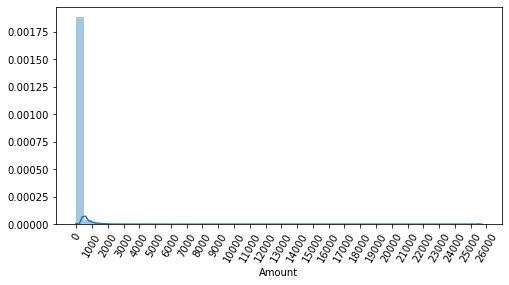

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [12]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))

    df_copy.insert(0, 'Amount_Scaled', amount_n)

    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [13]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


In [14]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [15]:
import numpy as np

print(1e-1000 == 0.0)

print(np.log(1e-1000))

print(np.log(1e-1000 + 1))
print(np.log1p(1e-1000))

var_1 = np.log1p(100)
var_2 = np.expm1(var_1)
print(var_1, var_2)

True
-inf
0.0
0.0
4.61512051684126 100.00000000000003


In [16]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


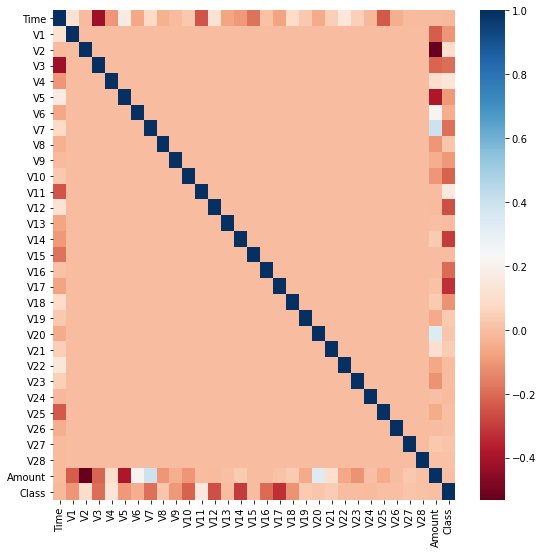

In [17]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [18]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [19]:
np.max(card_df['V14'])

10.5267660517847

In [20]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [21]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)

    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


In [23]:
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

In [24]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

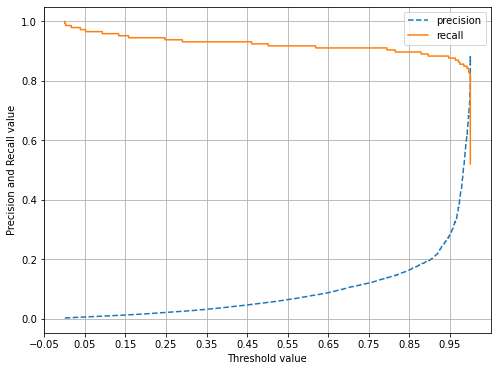

In [26]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )